# Neoclassical transport for an axisymmetric plasma

Currently a work in progress.

# Houlberg_1997

Equation 6:

$$F_\alpha^{ai} = \int m_a v L_{\alpha-1}^{3/2}(x_a^2)C_{ai} dv$$


$$<F_\alpha^{ai} \cdot B> = \sum_{b,j,\beta} l_{\alpha \beta}^{ai, bj} \hat{u}_\beta^{bj}$$


$$l_{\alpha \beta} ^{ai, bj} = \xi_{ai}(\delta_{ai,bj} M_{\alpha\beta}^a + \xi_{bj} N_{\alpha \beta}^{ab})$$

$$\xi_{ai} = n_{ai} Z_i^2 / \sum_i n_{ai} Z_i^2$$

$$\mu_{\alpha \beta}^{ai} = \frac{8}{3 \sqrt\pi} n_{ai} m_a (-1)^{\alpha + \beta} \times \int_0^\infty dx x^4 e^{-x^2} L_{\alpha-1}^{3/2} L_{\beta-1}^{3/2} \bar{K}^{ai}$$

$$\bar{K}^{ai} = K_B K_{PS} / (K_B + K_{PS})$$
(upuściłem superskrypt ai wszędzie);
$K_B, K_{PS}$ zdefiniowane w appendix B

Equation 23:

$$\sum_\beta (\xi_{ai} M^a_{\alpha \beta} - \hat{\mu}^{ai}_{\alpha\beta}) \hat{\mu}_\beta^{ai} - (\beta_{cx,a} + \beta_{an,\alpha}) \hat{u}_\alpha^{ai} 
= 
- \xi_{ai} =\sum_\beta \sum_b N^{ab}_{\alpha \beta} \bar{\mu}_\beta^b + \sum_\beta \hat{\mu}_{\alpha\beta}^{ai}S_{\theta,\beta}^{ai} - S_{E_\parallel,\alpha}^{ai} - S_{NBI\parallel, \alpha}^{ai}$$

$$\bar{\mu}_\beta^b = \sum_j \xi_{bj} \hat{\mu}_\beta^{bj}$$

Eventually we can go back to $$D^{C,\alpha} = \frac{- \Gamma^{C,\alpha}}{n_c \nabla(\ln \alpha)}$$

for $\alpha \in \{ T_e, T_i, n_e, n_D, n_C \}$

Eq. 41a:

$$\Gamma_{BP}^{ai} = -\hat{F} e_{ai}^{-1} \sum_\beta \hat{\mu}_{1\beta}^{ai} \hat{u}_{\theta,\beta}^{ai}$$

And the other gammas... around eq. 43

TODO assume we can skip heat flows for now. That's 41b

In [1]:
from plasmapy.particles import IonizationStateCollection

all_species = IonizationStateCollection(
    {
        "H": [0, 1],
        #      "D": [0, 1],   raises ParticleError, why?
        "C": [0, 0, 0, 0, 0, 0, 1],
    },
    n0=1e20 * u.m ** -3,
    abundances={"H": 1, "C": 0.08},
    T_e=10 * u.eV,
)
a = all_species["H"]
i = 1
ai = a[i]
all_species["H"].n_e

<Quantity 1.e+20 1 / m3>

In [2]:
h1 = all_species["H"][1]
h1.number_density, h1.T_i

(<Quantity 1.e+20 1 / m3>, <Quantity 116045.1812155 K>)

# Flux surface

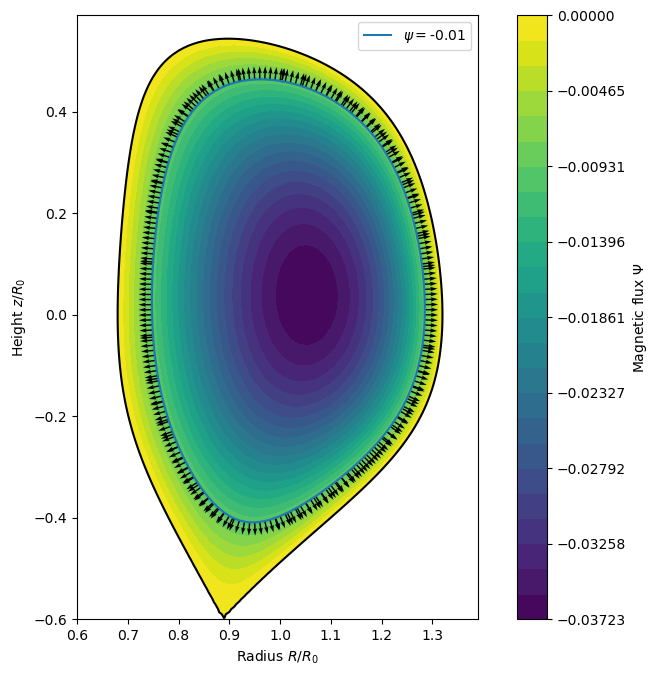

In [3]:
import plasmaboundaries

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = plasmaboundaries.ITER.copy()
assert params["triangularity"] <= 0.841  # for convex plasma surfaces
eq = SymbolicEquilibrium(**params, B0=5.2, config="single-null")
ax = eq.plot()
fs = flux_surface = eq.get_flux_surface(-0.01)
fs.plot(ax, n=True);

In [5]:
import itertools

from scipy import integrate
from tqdm.auto import tqdm

from plasmapy.formulary.neoclassical import _integrand

  0%|          | 0/36 [00:00<?, ?it/s]

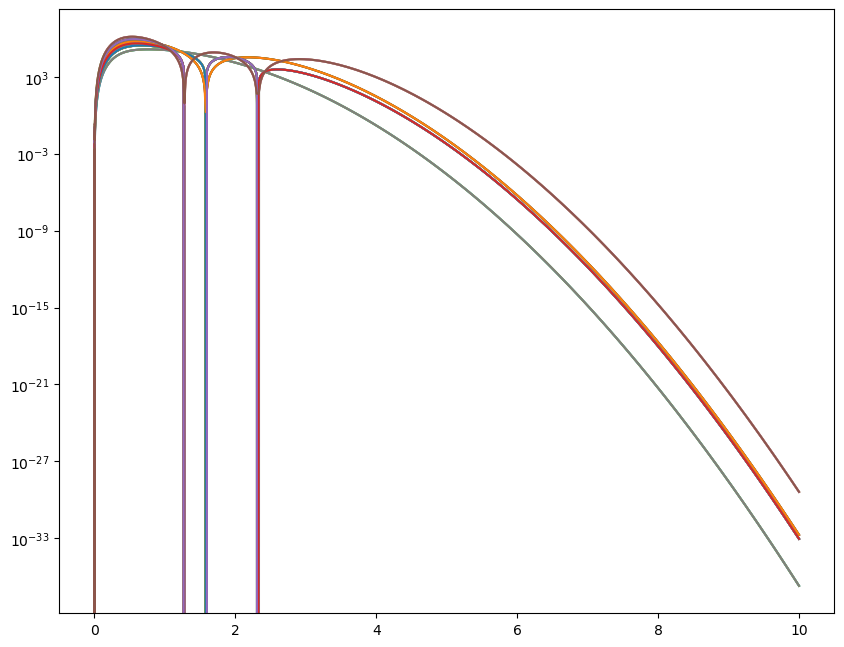

In [7]:
data = []
for (xmin, xmax, N, α, β) in tqdm(
    list(
        itertools.product(
            [0.0015, 0.015, 0.15, 0.00015],
            #     [0.015],
            #     [5],
            [10],
            [1000],
            #     [1000, 10000, 100],
            [1, 2, 3],
            [1, 2, 3],
        )
    )
):

    x = np.logspace(np.log10(xmin), np.log10(xmax), N)
    # x = np.logspace(-2.8, 1, 1000)
    y = _integrand(x, α, β, i, a, all_species, fs)
    integral = integrate.trapezoid(y, x)
    #         quad_integral = integrate.quad(_integrand, xmin, xmax, args=
    #                                       (α, β, i, a, all_species, fs))
    #         quad_integral, quad_unc = quad_integral
    quad_integral = integral
    diff = integral - quad_integral
    plt.plot(
        x, y, label=f"{(α,β)=}, {integral=:.3e}, {quad_integral=:.3e}, {diff=:.3e}"
    )
    data.append(dict(xmin=xmin, xmax=xmax, integral=integral, α=α, β=β, N=N))
plt.yscale("log")
# plt.legend()

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

In [ ]:
df.query("xmin== 0.00150 and xmax==10 and N==1000").plot.scatter(
    x="α", y="integral", c="β"
)

In [13]:
n = fs.Bvectors / np.linalg.norm(fs.Bvectors, axis=0)

array([[-0.98521589, -0.98754886, -0.99292411, -0.99690886, -0.99933367,
        -0.99997023, -0.99852257, -0.99461897, -0.98780621, -0.98037979,
        -0.97753789, -0.96314591, -0.94397372, -0.91933434, -0.91903923,
        -0.88833103, -0.85288766, -0.85061844, -0.80555078, -0.78664763,
        -0.7532723 , -0.72275842, -0.69418454, -0.66289801, -0.62920897,
        -0.60773977, -0.55983797, -0.55738367, -0.51201947, -0.4876193 ,
        -0.4709447 , -0.43396758, -0.4147462 , -0.40062044, -0.37058829,
        -0.34334663, -0.34308594, -0.31881978, -0.29648763, -0.27611071,
        -0.27396482, -0.25757712, -0.24057413, -0.22491595, -0.21044854,
        -0.20812383, -0.19708077, -0.18463807, -0.17300005, -0.16206756,
        -0.15175078, -0.14363903, -0.14197198, -0.1326673 , -0.12374861,
        -0.11515396, -0.10682602, -0.09871153, -0.09076079, -0.08292723,
        -0.07516702, -0.06743875, -0.06280168, -0.05970379, -0.0519243 ,
        -0.04406377, -0.03608858, -0.02796661, -0.0

In [14]:
plt

<module 'matplotlib.pyplot' from '/usr/lib/python3.9/site-packages/matplotlib/pyplot.py'>

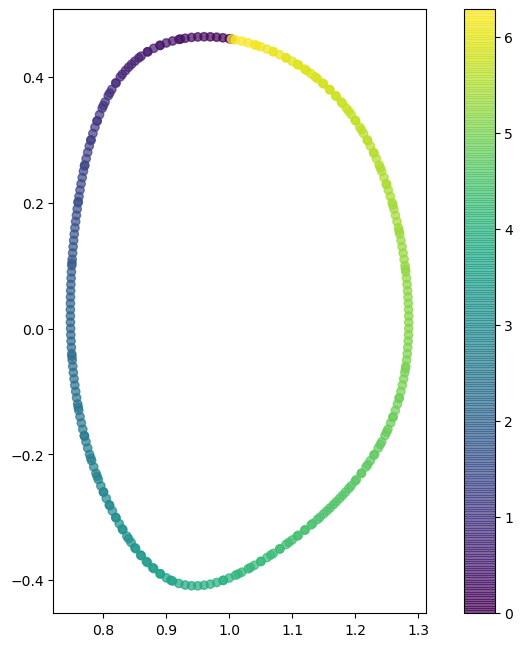

In [15]:
def plot_on_curve(y):
    plt.scatter(fs.R, fs.Z, c=y, alpha=0.7)
    plt.gca().set_aspect("equal")
    plt.colorbar()


plot_on_curve(fs.Theta)

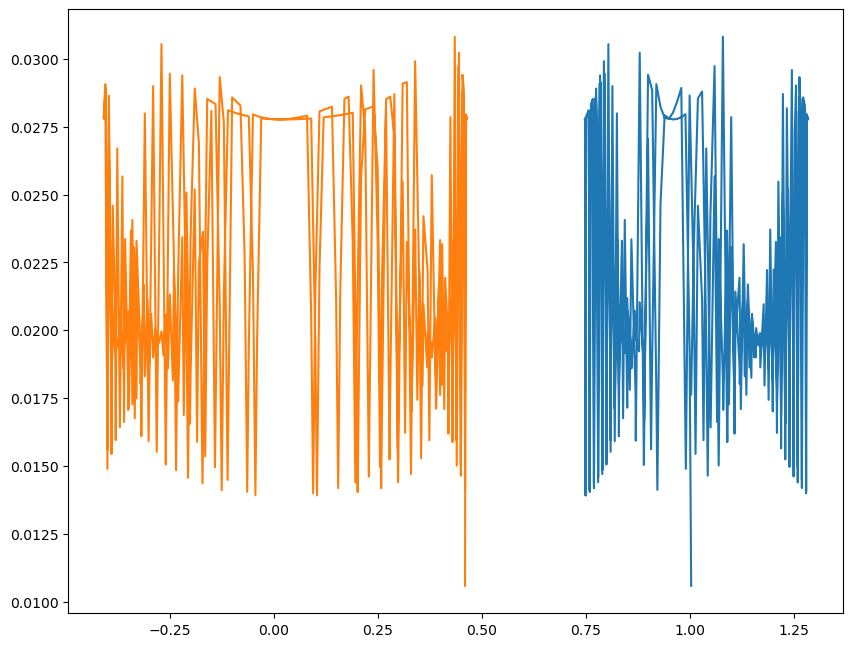

In [16]:
plt.plot(fs.R, fs.theta)
plt.plot(fs.Z, fs.theta)

In [17]:
np.gradient(fs.theta, fs.lp) * n

array([[-1.23595155e+00, -1.07966878e+00, -4.20591251e-01,
         8.73256901e-03,  4.18100101e-03, -1.15147124e-03,
        -7.37559439e-03,  1.89404353e-01,  1.43298208e+00,
         8.83745283e-01, -7.42216756e-01, -5.44039099e-01,
         1.64183237e+00,  1.20650183e+00, -4.59901124e-01,
         1.03079997e+00,  1.00684516e+00, -3.79853926e-01,
         1.60014609e-01,  2.10644667e-01, -4.32524551e-02,
         1.00870378e-01, -8.00363142e-02,  9.51770688e-02,
        -1.02254195e-02,  1.90061528e-01,  2.76796324e-01,
        -2.12355951e-01,  3.58650821e-01,  3.23328391e-01,
        -2.43932082e-01,  3.92595305e-01,  2.53906015e-01,
        -3.19074168e-01,  5.83866416e-01,  4.77792728e-01,
        -1.44184370e-01, -2.18365724e-01,  4.27673448e-01,
         3.39692861e-01, -6.48899712e-02, -1.90297772e-01,
        -1.60904315e-02,  2.82762968e-01,  2.46650778e-01,
        -2.81145343e-02, -1.50871065e-01, -2.05729030e-02,
         9.26807544e-04,  2.31968327e-02,  2.39881761e-0

In [19]:
fs.theta

array([0.01058179, 0.01930282, 0.02796037, 0.02785126, 0.02778475,
       0.02776753, 0.02780788, 0.02791603, 0.02464866, 0.01411895,
       0.01776574, 0.02884757, 0.02941154, 0.01503371, 0.01537102,
       0.03022592, 0.0159317 , 0.01767184, 0.02335152, 0.01780471,
       0.02118272, 0.01917108, 0.01926086, 0.02097362, 0.01798637,
       0.02332257, 0.01710984, 0.01725798, 0.02571466, 0.01594577,
       0.02219176, 0.02420127, 0.01527926, 0.02167887, 0.02991413,
       0.01502672, 0.0146993 , 0.02913862, 0.02908737, 0.01610465,
       0.01439892, 0.0271239 , 0.02860844, 0.02850537, 0.01662398,
       0.01417774, 0.02592321, 0.02825074, 0.02819308, 0.02814204,
       0.02565624, 0.01403693, 0.01645386, 0.02801189, 0.02798056,
       0.02795229, 0.02792672, 0.02790356, 0.02788256, 0.02786353,
       0.02784632, 0.0222678 , 0.01391155, 0.01946742, 0.02780374,
       0.02779338, 0.02778458, 0.02777742, 0.02777197, 0.02776835,
       0.02776672, 0.02776724, 0.02777013, 0.02777561, 0.02778

In [20]:
fs.flux_surface_average(fs.Bp * np.gradient(fs.theta, fs.lp),)

-0.02555001484312764

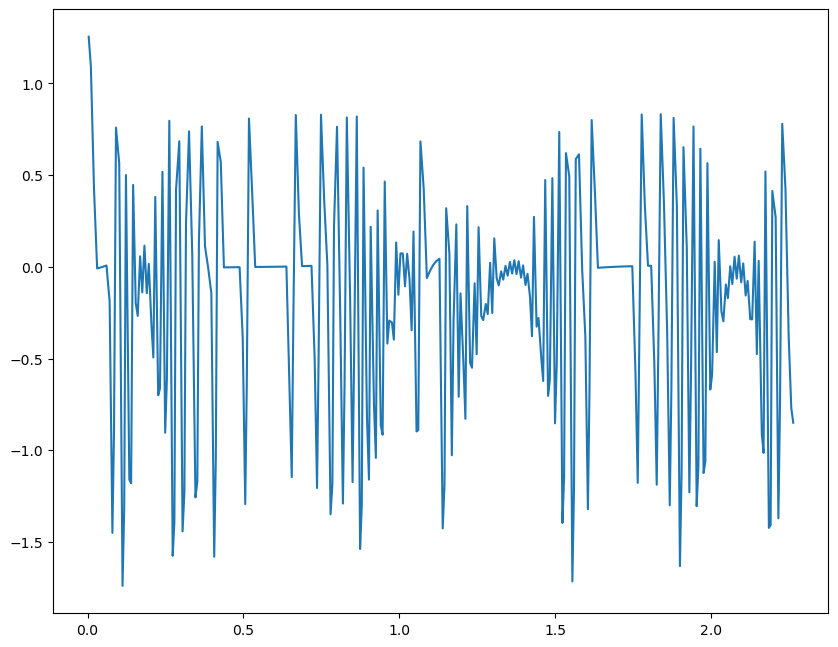

In [21]:
plt.plot(fs.lp, np.gradient(fs.theta, fs.lp))

In [22]:
R, Z = eq.symbols

Okay. I think I'm starting to get it.

I need to calculate the toroidal and poloidal flux from this.

The toroidal flux...

also,

> $\sqrt{g}$ is the Jacobian of the transformation from cylindrical coordinates to flux coordinates,

So this would be... $(R, Z, \phi) \to (\psi, \theta, \phi)$...

In [23]:
fs.theta

array([0.01058179, 0.01930282, 0.02796037, 0.02785126, 0.02778475,
       0.02776753, 0.02780788, 0.02791603, 0.02464866, 0.01411895,
       0.01776574, 0.02884757, 0.02941154, 0.01503371, 0.01537102,
       0.03022592, 0.0159317 , 0.01767184, 0.02335152, 0.01780471,
       0.02118272, 0.01917108, 0.01926086, 0.02097362, 0.01798637,
       0.02332257, 0.01710984, 0.01725798, 0.02571466, 0.01594577,
       0.02219176, 0.02420127, 0.01527926, 0.02167887, 0.02991413,
       0.01502672, 0.0146993 , 0.02913862, 0.02908737, 0.01610465,
       0.01439892, 0.0271239 , 0.02860844, 0.02850537, 0.01662398,
       0.01417774, 0.02592321, 0.02825074, 0.02819308, 0.02814204,
       0.02565624, 0.01403693, 0.01645386, 0.02801189, 0.02798056,
       0.02795229, 0.02792672, 0.02790356, 0.02788256, 0.02786353,
       0.02784632, 0.0222678 , 0.01391155, 0.01946742, 0.02780374,
       0.02779338, 0.02778458, 0.02777742, 0.02777197, 0.02776835,
       0.02776672, 0.02776724, 0.02777013, 0.02777561, 0.02778

In [24]:
eq.Bphifunc(fs.R, fs.Z)

array([5.46453491, 5.48503568, 5.54044008, 5.59697518, 5.65467596,
       5.71357883, 5.77372177, 5.83514434, 5.89788782, 5.9461761 ,
       5.9619953 , 6.02751173, 6.09448409, 6.16296144, 6.16369157,
       6.23299509, 6.30061454, 6.30463871, 6.37794846, 6.4059929 ,
       6.45298315, 6.49338488, 6.52980438, 6.56815656, 6.60847672,
       6.63358422, 6.6890679 , 6.69187819, 6.7436224 , 6.77164898,
       6.79079097, 6.83366609, 6.8562946 , 6.87301878, 6.90908007,
       6.94275964, 6.94308314, 6.97346382, 7.00223828, 7.02924299,
       7.03209702, 7.05410806, 7.07744243, 7.09941239, 7.120108  ,
       7.12342296, 7.13929478, 7.15732405, 7.17432084, 7.19033761,
       7.20542012, 7.21715221, 7.21956712, 7.23267592, 7.24497151,
       7.25647642, 7.26720868, 7.2771821 , 7.28640645, 7.29488776,
       7.30262843, 7.30962746, 7.3133809 , 7.3158476 , 7.32127633,
       7.32595333, 7.32986527, 7.33299619, 7.33532768, 7.33683902,
       7.33750734, 7.33730779, 7.33621372, 7.33419693, 7.33122

In [25]:
eq.psisym

0.15888055491167*R**6*log(R) - 0.242130474643052*R**6 - 1.90656665894004*R**4*Z**2*log(R) + 2.11116292115827*R**4*Z**2 + 1.03225575549707*R**4*Z*log(R) - 1.21928446464091*R**4*Z + 0.685680947933434*R**4*log(R) + 0.0605795594787041*R**4 + 1.27104443929336*R**2*Z**4*log(R) - 0.454158617968831*R**2*Z**4 - 1.37634100732943*R**2*Z**3*log(R) + 0.593456864024138*R**2*Z**3 - 2.74272379173374*R**2*Z**2*log(R) - 1.72186108171512*R**2*Z**2 + 1.82053360634878*R**2*Z*log(R) + 1.00037446462688*R**2*Z + 0.170105114150866*R**2*log(R) + 0.0776775859471283*R**2 - 0.0847362959528905*Z**6 + 0.137634100732943*Z**5 + 0.457120631955623*Z**4 - 0.606844535449594*Z**3 - 0.247605114150867*Z**2 + 0.207902757241057*Z + 0.0680021186726767

In [26]:
fs.Bphivals

array([5.46453491, 5.48503568, 5.54044008, 5.59697518, 5.65467596,
       5.71357883, 5.77372177, 5.83514434, 5.89788782, 5.9461761 ,
       5.9619953 , 6.02751173, 6.09448409, 6.16296144, 6.16369157,
       6.23299509, 6.30061454, 6.30463871, 6.37794846, 6.4059929 ,
       6.45298315, 6.49338488, 6.52980438, 6.56815656, 6.60847672,
       6.63358422, 6.6890679 , 6.69187819, 6.7436224 , 6.77164898,
       6.79079097, 6.83366609, 6.8562946 , 6.87301878, 6.90908007,
       6.94275964, 6.94308314, 6.97346382, 7.00223828, 7.02924299,
       7.03209702, 7.05410806, 7.07744243, 7.09941239, 7.120108  ,
       7.12342296, 7.13929478, 7.15732405, 7.17432084, 7.19033761,
       7.20542012, 7.21715221, 7.21956712, 7.23267592, 7.24497151,
       7.25647642, 7.26720868, 7.2771821 , 7.28640645, 7.29488776,
       7.30262843, 7.30962746, 7.3133809 , 7.3158476 , 7.32127633,
       7.32595333, 7.32986527, 7.33299619, 7.33532768, 7.33683902,
       7.33750734, 7.33730779, 7.33621372, 7.33419693, 7.33122

# Appendix B

### F_m and its unknown values

0.01110030302773168

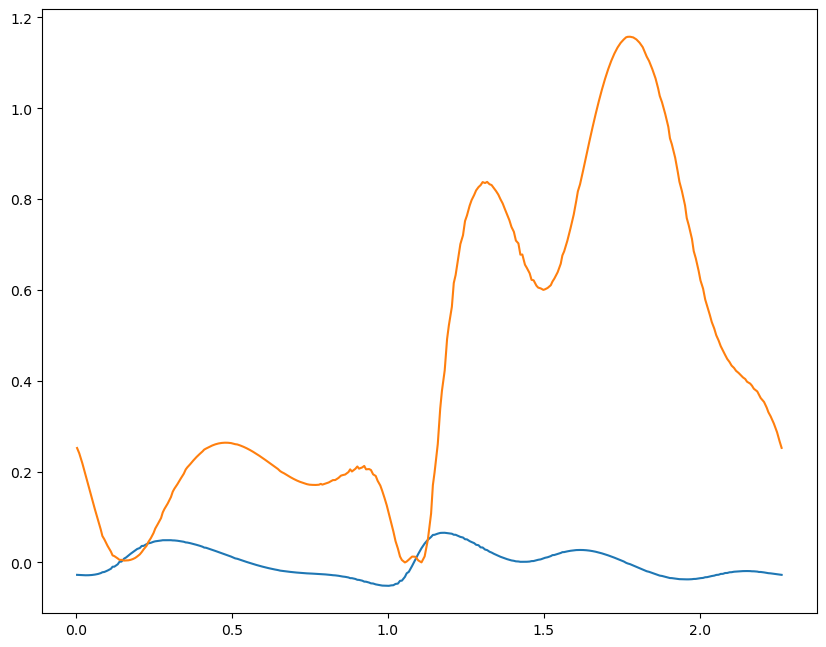

In [27]:
Theta = fs.Theta
B20 = fs.Brvals * fs.Bprimervals + fs.Bzvals * fs.Bprimezvals
plt.plot(fs.lp, B20)

# B17
Bprimevectors = np.stack((fs.Bprimervals, fs.Bprimezvals))

under_average_B17 = np.array(
    [np.dot(ni, Bpi) ** 2 for (ni, Bpi) in zip(fs.n.T, Bprimevectors.T)]
)
plt.plot(fs.lp, under_average_B17)
B2mean = fs.flux_surface_average(fs.B2)
B17 = fs.flux_surface_average(under_average_B17) / B2mean

In [28]:
num_m = 10000


from plasmapy.formulary.neoclassical import F_m

# optimization = optimize.minimize_scalar(optimizer)
mrange = range(1, 2 * num_m)
F_ms = np.array([F_m(m, fs, 1) for m in mrange])

array([2.05153536e-07, 7.03758069e-05, 2.79481827e-06, ...,
       9.48252106e-07, 2.87480497e-07, 3.72489479e-06])

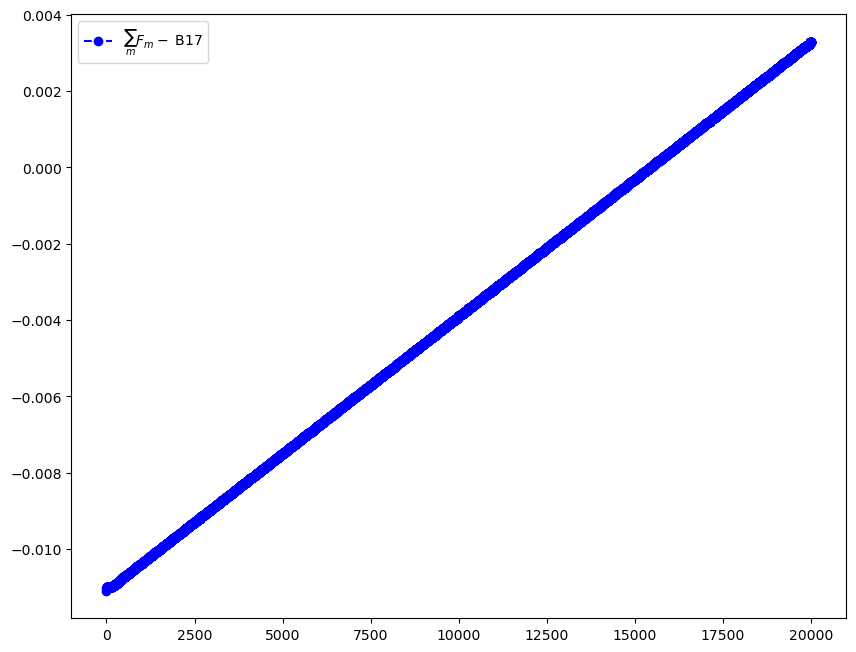

In [29]:
cumsum = np.cumsum(F_ms)

plt.plot(cumsum - B17, "bo--", label=r"$\sum_m F_m -$ B17")
# plt.axhline(0, color="black"
#            )
# plt.yscale("log")
# plt.xticks(mrange)
plt.legend()

So this probably sucks as a solution, a little.

In [30]:
from plasmapy.formulary.neoclassical import K_ps_ai

K_ps_ai(1, 1, a, all_species, fs, g=optimization.x, m_max=100)

NameError: name 'optimization' is not defined

In [ ]:
from plasmapy.formulary.neoclassical import K_B_ai

In [ ]:
K_B_ai(1, 1, a, all_species, fs)

$$[K_B^{ai}] = \frac{1}{1} \frac{[\nu_{D,ai}]}{1}$$

$$[\nu_{D,ai}] = s^{-1}$$

In [ ]:
from plasmapy.formulary.neoclassical import ν_T_ai

ν_T_ai(1, 1, a, all_species)

In [ ]:
from plasmapy.formulary.neoclassical import mu_hat, ωm

In [31]:
from plasmapy.formulary import thermal_speed

## \nu_T_ai

In [32]:
from scipy.special import erf

from plasmapy.formulary import thermal_speed
from plasmapy.formulary.mathematics import Chandrasekhar_G
from plasmapy.formulary.neoclassical import (
    effective_momentum_relaxation_rate,
    xab_ratio,
    ξ,
)

x = np.logspace(-3, 6, 5000)

ai = a[i]
prefactor = 3 * np.pi ** 0.5 / 4 * ξ(a)[i] / ai.number_density / ai.ion.mass


def gen():
    for b in all_species:
        if b.base_particle != a.base_particle:  # TODO is not should work
            x_over_xab = x / xab_ratio(a, b).si.value
            part1 = erf(x_over_xab) - 3 * Chandrasekhar_G(x_over_xab) / x ** 3
            part2 = 4 * (a.T_e / b.T_e + xab_ratio(a, b) ** -2)  # TODO adjust ratios
            part2full = part2 * Chandrasekhar_G(x_over_xab) / x
            yield (part1 + part2full) * effective_momentum_relaxation_rate(a, b)


result = prefactor * sum(gen())

<Quantity [-3.15477856e+13, -3.12872990e+13, -3.10289631e+13, ...,
            8.09962829e+06,  8.09962829e+06,  8.09962829e+06] 1 / s>

NameError: name 'ν_T_ai' is not defined

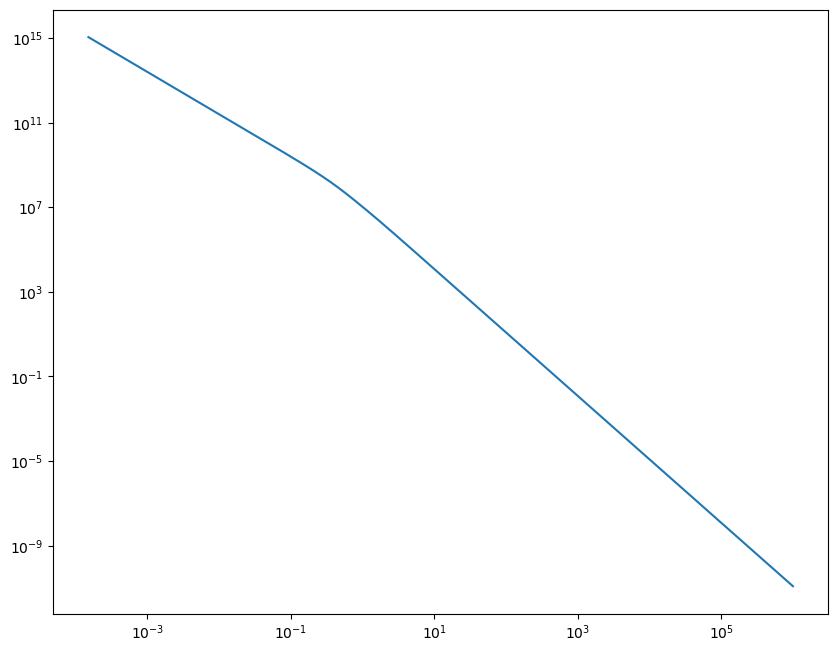

In [33]:
from plasmapy.formulary.mathematics import Chandrasekhar_G
from plasmapy.formulary.neoclassical import K_B_ai, pitch_angle_diffusion_rate

x = np.logspace(np.log10(xmin), 6, 5000)
ν_D_ai = pitch_angle_diffusion_rate(x, 1, a, all_species)
k = K_B_ai(x, 1, a, all_species, flux_surface)
g = Chandrasekhar_G(x)
plt.loglog(x, k)
x = np.logspace(-3, 6, 5000)
plt.loglog(x, ν_T_ai(x, i, a, all_species))

## K_ps_ai

In [34]:
ai = a[i]
ν = ν_T_ai(x, i, a, all_species)

flux_surface = fs
# g = optimization.x
g = 1
m_max = 100
m = np.arange(1, m_max + 1)
F = F_m(m[:, np.newaxis], flux_surface, g=g)  # TODO replace
ω = ωm(x, m[:, np.newaxis], a, flux_surface)
B10 = (
    1.5 * (ν / ω) ** 2
    - 9 / 2 * (ν / ω) ** 4
    + (1 / 4 + (3 / 2 + 9 / 4 * (ν / ω) ** 2) * (ν / ω) ** 2)
    * (2 * ν / ω)
    * np.arctan(ω / ν).si.value
)
print(F.shape, B10.shape)
onepart = F[:, np.newaxis] * B10
full_sum = np.sum(onepart / ν, axis=0)
print(f"{full_sum=}")

out = 3 / 2 * thermal_speed(a.T_e, a.base_particle) ** 2 * x ** 2 * full_sum / u.m ** 2

plt.loglog(x, out)

NameError: name 'ν_T_ai' is not defined

In [35]:
Y = np.logspace(-5, 2, 1000)
ν = ν_T_ai(Y, i, a, all_species)
plt.loglog(Y, ν)

NameError: name 'ν_T_ai' is not defined

In [36]:
ν_T_ai(Y[ν < 0][0], i, a, all_species)

NameError: name 'ν_T_ai' is not defined

In [37]:
ν_T_ai(0.1, i, a, all_species)

NameError: name 'ν_T_ai' is not defined

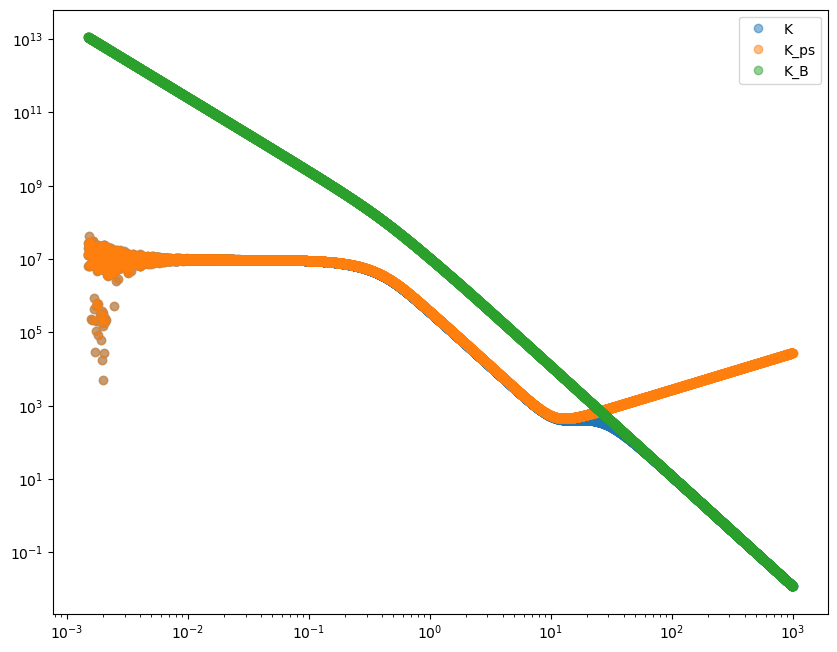

In [38]:
from plasmapy.formulary.neoclassical import K

x = np.logspace(np.log10(0.0015), 3, 10000)
kout = K(x, 1, a, all_species, fs)
kpout = K_ps_ai(x, 1, a, all_species, fs)
kbout = K_B_ai(x, 1, a, all_species, fs)
plt.loglog(x, kout, "o", label="K", alpha=0.5)
plt.loglog(x, kpout, "o", label="K_ps", alpha=0.5)
plt.loglog(x, kbout, "o", label="K_B", alpha=0.5)
plt.legend()
plt.savefig("/tmp/wtf.png")

In [39]:
from scipy import integrate

In [41]:
Y = np.logspace(-5, -2, 1000)
kpout = K_ps_ai(Y, 1, a, all_species, fs, g=optimization.x,)
plt.loglog(Y, kpout, "o", label="K_ps")

NameError: name 'optimization' is not defined

In [43]:
from plasmapy.formulary.neoclassical import *

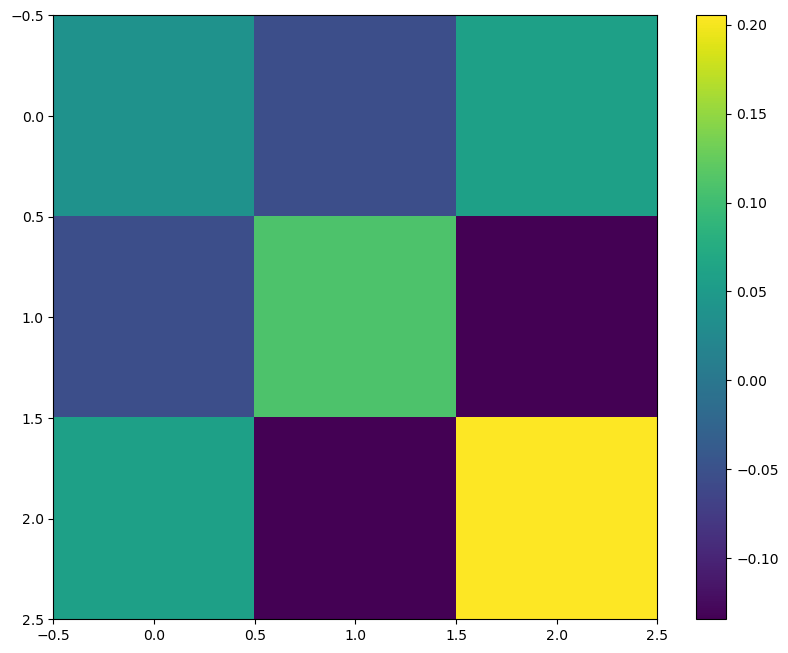

In [47]:
plt.imshow(mu_hat(1, a, all_species, fs).si.value)
plt.colorbar()